# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=5)
lngs = np.random.uniform(low=-180.000, high=180.000, size=5)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    #If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
cities

['saint george', 'fort nelson', 'sorland', 'bonavista', 'pangnirtung']

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [19]:
# set up lists to hold response info
lat = []
temp = []
hum = []
cloud = []
wind = []

# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

# Viewing the straight Json
# weather_response = requests.get(query_url + city)
# weather_json = weather_response.json()
# city_id = weather_json["id"]
# city_name = weather_json["name"]



# Loop through the list of cities and perform a request for data on each
for city in cities:
    weather_response = requests.get(query_url + city)
    weather_json = weather_response.json()
    city_id = weather_json["id"]
    city_name = weather_json["name"]
    
    #Error handling    
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp'])
        hum.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        print(f"Retrieving information for City: {city_name} and City ID is: {city_id} ")
            
    except (KeyError, IndexError):
        print("Missing city... skipping.")
        
# print(f"The latitude information received is: {lat}")
# print(f"The temperature information received is: {temp}")
# print(f"The humidity information received is: {hum}")
# print(f"The cloudyiness information received is: {cloud}")
# print(f"The wind information received is: {wind}")
# weather_json


Retrieving information for City: Saint George and City ID is: 262462 
Retrieving information for City: Fort Nelson and City ID is: 5955902 
Retrieving information for City: Sorland and City ID is: 3137469 
Retrieving information for City: Bonavista and City ID is: 5905393 
Retrieving information for City: Pangnirtung and City ID is: 6096551 


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [25]:
weather_dict = {
    "Latitude": lat,
    "Temp": temp,
    "Humidity": hum,
    "Cloudiness (%)": cloud,
    "Wind Speed (MPH)": wind
    }
weather_data = pd.DataFrame(weather_dict)
weather_data.head()    

,Latitude,Temp,Humidity,Cloudiness (%),Wind Speed (MPH)
0,39.45,18.59,88,20,1.603
1,58.81,3.00,64,90,1.000
2,67.67,1.41,63,20,6.200
3,48.65,8.33,87,70,3.776
4,66.15,0.00,88,90,6.700


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

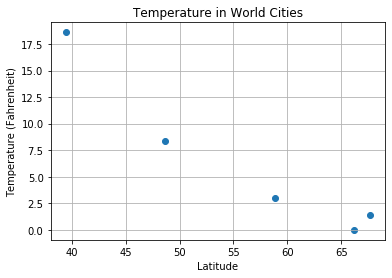

In [28]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Latitude"], weather_data["Temp"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (Fahrenheit)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

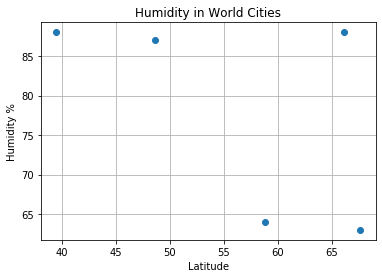

In [29]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Latitude"], weather_data["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Humidity in World Cities")
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

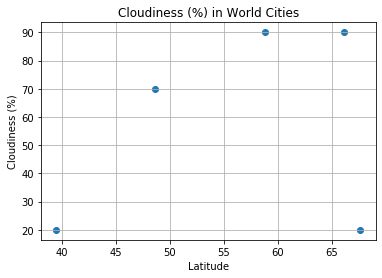

In [31]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Latitude"], weather_data["Cloudiness (%)"], marker="o")

# Incorporate the other graph properties
plt.title("Cloudiness (%) in World Cities")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

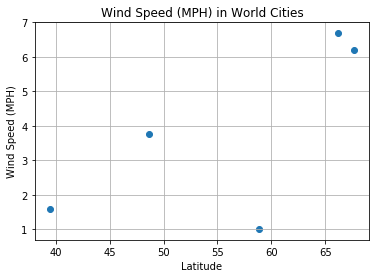

In [32]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Latitude"], weather_data["Wind Speed (MPH)"], marker="o")

# Incorporate the other graph properties
plt.title("Wind Speed (MPH) in World Cities")
plt.ylabel("Wind Speed (MPH)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()